# Goal

# Hypothesis

# Importing modules/ dataset

In [1]:
# code to ensure that any changes made to the module files are reflected in the Jupyter Notebook upon import
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import cleaning
from cleaning import cleaning
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
file_name = 'googleplaystore.csv'
df = pd.read_csv(file_name)

# Exploratory Data Analysis (EDA)

In [4]:
# Display the first few rows of the dataset

print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [5]:
## print("Dataset shape:", df.shape)
print("First 5 rows:", df.head())
print("Data types:", df.dtypes)

First 5 rows:                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & D

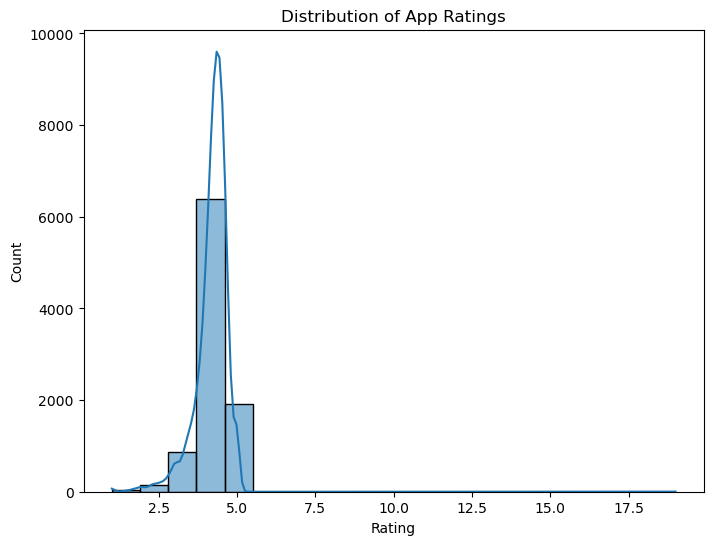

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

It appears that most of the apps have high ratings, with a skew towards the 4-5 range. This concentration of high ratings could suggest that either most apps are of good quality, or there may be a tendency for users to provide positive feedback, or possibly only satisfied users rate the apps.

From the graph, it also looks like there's a smaller number of apps with very low ratings (between 0 and 2). It's common in app stores for poorly performing apps to receive fewer ratings because they are downloaded less often, or dissatisfied users may choose to uninstall rather than rate.

The steep drop-off and the peak around the 4.5 rating could be indicative of a 'J-shaped' distribution, which is often observed in customer satisfaction and rating datasets. Users tend to rate apps they feel strongly about, leading to higher numbers of high and low ratings, with fewer in the middle range.

We may want to explore further:

Analyzing the relationship between the number of reviews and app ratings.

Investigating how rating distributions vary by category or content rating.

Examining the impact of other factors such as app size or price on ratings.

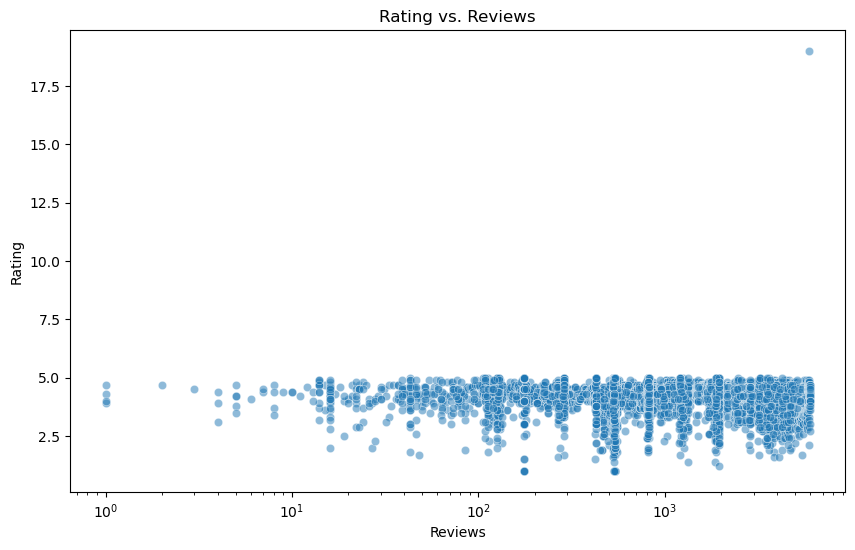

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', alpha=0.5)
plt.title('Rating vs. Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

Positive Correlation:

There seems to be a trend where apps with more reviews tend to have higher ratings. This could suggest that higher-quality apps receive more user engagement, or apps that are more popular (and thus have more reviews) are generally rated better.

Density of Points:

Most of the data points are clustered towards the lower end of the review scale (fewer reviews), which is typical of app stores where many apps have some reviews, but only a few become highly popular.

Rating Range:

Apps with very few reviews show a wider range of ratings, from very low to very high. As the number of reviews increases, the range of ratings tends to narrow, focusing more on the higher ratings (3.5 to 5.0).

High-Rating Cluster:

There's a dense cluster of apps in the 4.0-4.7 rating range with varying numbers of reviews. It's interesting to note that there are not many apps with a large number of reviews that have very low ratings.

Outliers:

There are a few apps with a high number of reviews and perfect ratings, which are outliers. These could be extremely popular apps with a large user base.


Based on this plot, we might consider:

Investigating if there's a threshold number of reviews after which the rating stabilizes.

Looking into apps with high ratings but few reviews to determine if they are new or niche apps.

Analyzing the outliers with many reviews and perfect ratings to understand what makes them successful.

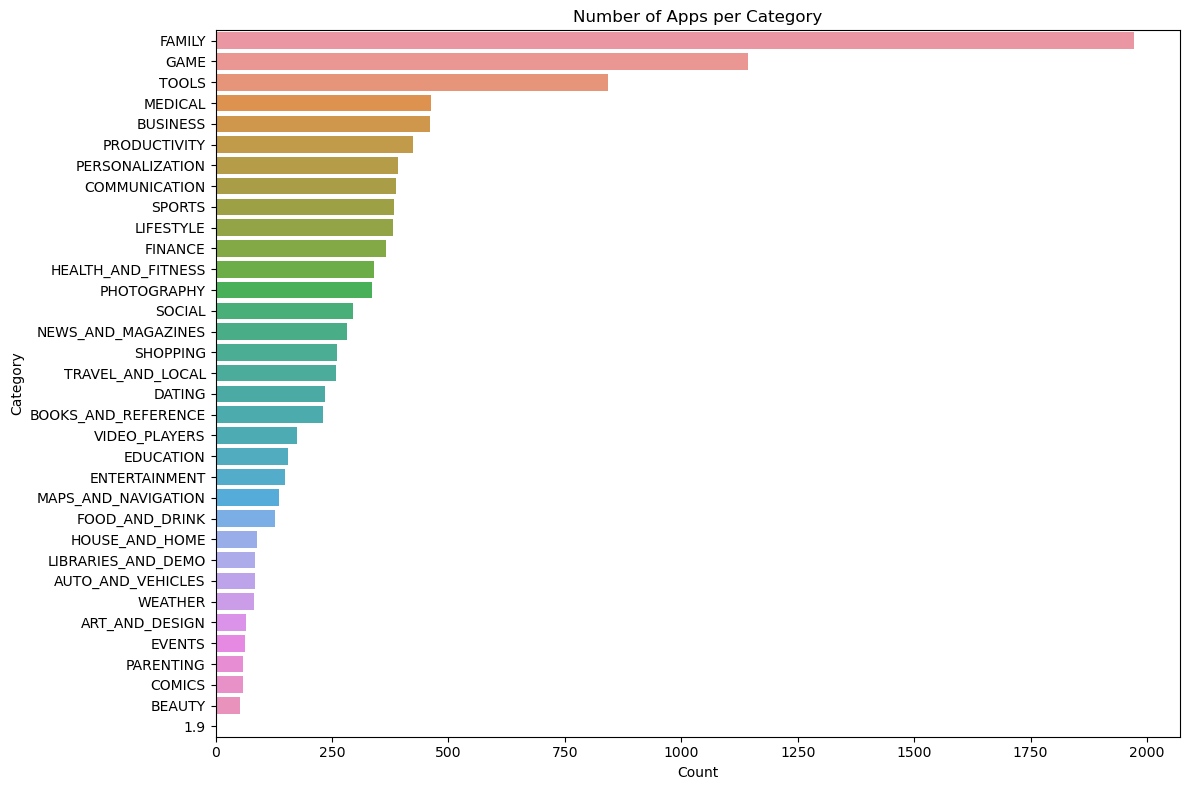

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Family and Game Dominance:

The 'Family' and 'Game' categories have the highest number of apps by a significant margin, indicating a strong focus on entertainment and family-oriented content in the Google Play Store.

Other Popular Categories:

'Tools', 'Medical', and 'Business' also show a substantial presence, suggesting a good market for utility and productivity apps.

Less Populated Categories:

On the other end of the spectrum, 'Beauty', 'Comics', 'Parenting', 'Events', 'Art & Design' have fewer apps. This might indicate less competition in these categories, or they could be niche markets with fewer overall users.

Market Saturation and Opportunity:

Categories with a large number of apps might be more competitive, making it harder for new apps to stand out. In contrast, categories with fewer apps might represent opportunities for developers to fill a gap or bring something new to the table.

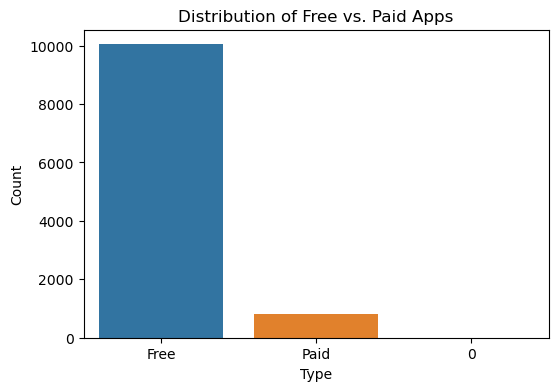

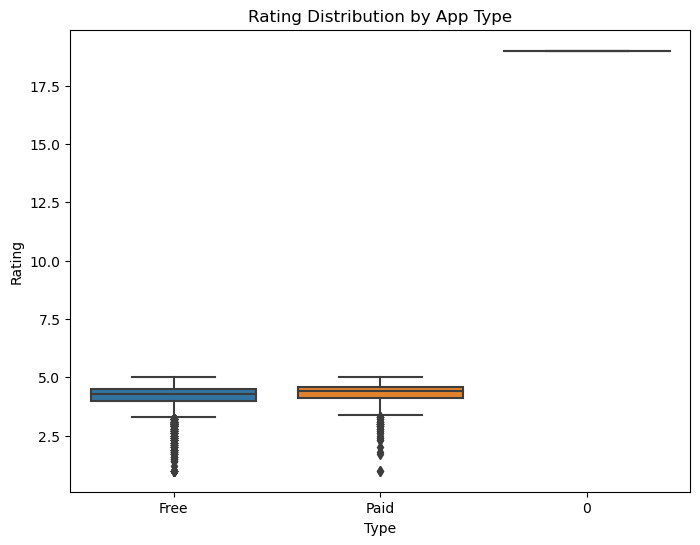

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Rating')
plt.title('Rating Distribution by App Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

From the first bar chart (Distribution of Free vs. Paid Apps):

There is a vast majority of free apps compared to paid apps. This is typical in app stores where free apps tend to dominate, as the barrier to entry is lower for users.

From the second box plot (Rating Distribution by App Type):

Both free and paid apps have a similar median rating around the 4 to 4.5 mark.
The interquartile range (middle 50% of ratings) for paid apps is slightly tighter than for free apps, which could suggest that paid apps have a more consistent rating, whereas free apps have a bit more variation in how they are perceived by users.
There are outliers in both categories, with some apps receiving very low ratings, indicated by the points below the bottom whiskers of the box plots.

These visualizations can inform us that while free apps are more prevalent, the quality of apps (as perceived by users' ratings) does not significantly differ between free and paid apps. However, the consistency in ratings might be slightly higher for paid apps.

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Size_MB', bins=30, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `Size_MB` for parameter `x`

<Figure size 1000x600 with 0 Axes>

Skewed Distribution:

The distribution is right-skewed, meaning most apps have a smaller size, but there is a long tail of apps with larger sizes.

Common App Size:

The majority of apps are under 20 MB in size, which may be due to the ease of downloading and storing smaller apps, especially in areas with limited storage or slower internet speeds.

Larger Apps:

There are fewer apps as the size increases, which is consistent with the idea that larger apps may be more complex, include more features, or have higher quality graphics and content.

Optimization and Accessibility:

App developers might be optimizing their apps to be accessible for users with limited resources. Smaller apps are also more likely to be downloaded and retained by users.

In [11]:
# Summary statistics for numerical features

print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [12]:
# Count of unique values in categorical columns

for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in App: 9660
Unique values in Category: 34
Unique values in Reviews: 6002
Unique values in Size: 462
Unique values in Installs: 22
Unique values in Type: 3
Unique values in Price: 93
Unique values in Content Rating: 6
Unique values in Genres: 120
Unique values in Last Updated: 1378
Unique values in Current Ver: 2832
Unique values in Android Ver: 33


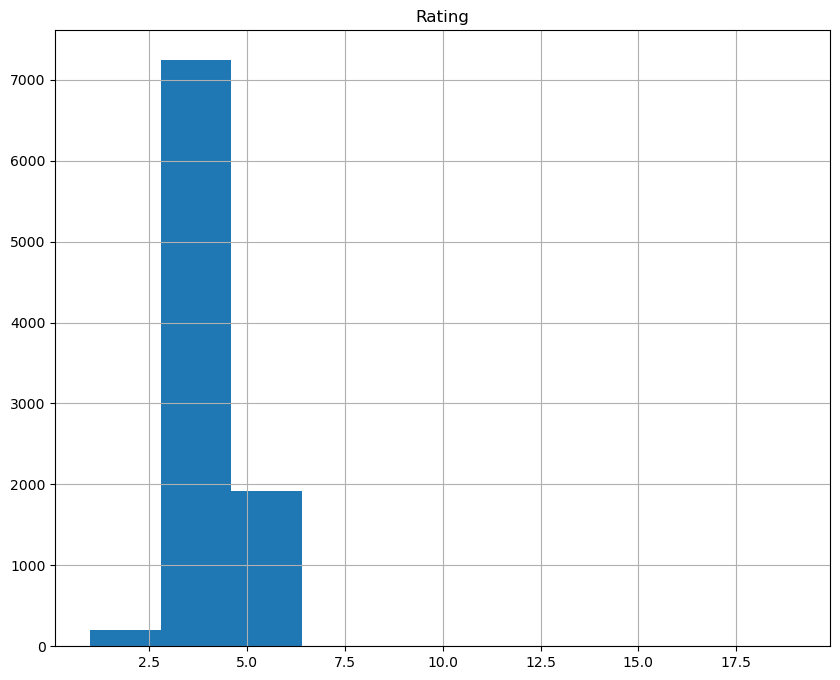

In [13]:
# Plotting distributions of numerical features

df.hist(figsize=(10, 8))
plt.show()

# Data Cleaning

In [14]:
df = cleaning(df)

/Users/hugogomes/IronHack/Data Analytics/Week 4/cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(float)
/Users/hugogomes/IronHack/Data Analytics/Week 4/cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"] = df["Reviews"].astype(int)
/Users/hugogomes/IronHack/Data Analytics/Week 4/cleaning.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


# (temporary section, with some comments)

In [16]:
# decide what to do with these two categories

display(df["Category"].value_counts())
display(df["Genres"].value_counts())
df["Category"].nunique() # 33
df["Genres"].nunique() # 119

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

Genres
Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

119

In [17]:
# will we use size in analysis? If yes, to clean

df["Size"].shape[0] # 10840
sum(df["Size"].str.contains("M")) # 8829
sum(df["Size"].str.contains("k")) # 316
sum(df["Size"].str.contains("Varies with device")) # 1695

1695

In [18]:
df["Type"].value_counts() # categorical, "free" and "paid"
df["Content Rating"].value_counts() # categorical, "everyne", "teen", "mature 17+" etc

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [19]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1016.2+ KB


In [22]:
genre_counts = df['Genres'].value_counts()

top_5_genres = genre_counts.head(5)

print(top_5_genres)

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64


In [23]:
df_genres = top_5_genres.reset_index()

In [24]:
df_top_genres = df[df['Genres'].isin(df_genres["Genres"])]

In [25]:
df_top_genres.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-30
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000,Free,0.0,Everyone,Business,2018-05-21
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000,Free,0.0,Everyone,Business,2018-08-03
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,5000000,Free,0.0,Everyone,Business,2018-07-17
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000,Free,0.0,Everyone,Business,2018-05-04


# Data Visualization and Interpreting Results

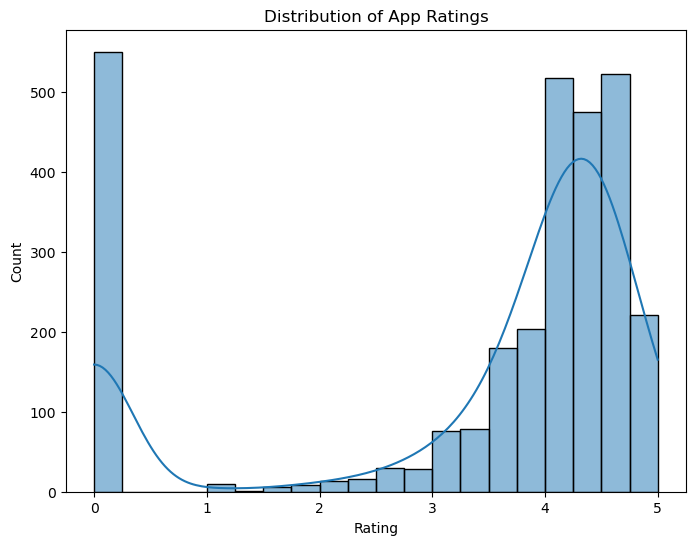

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_top_genres, x='Rating', bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

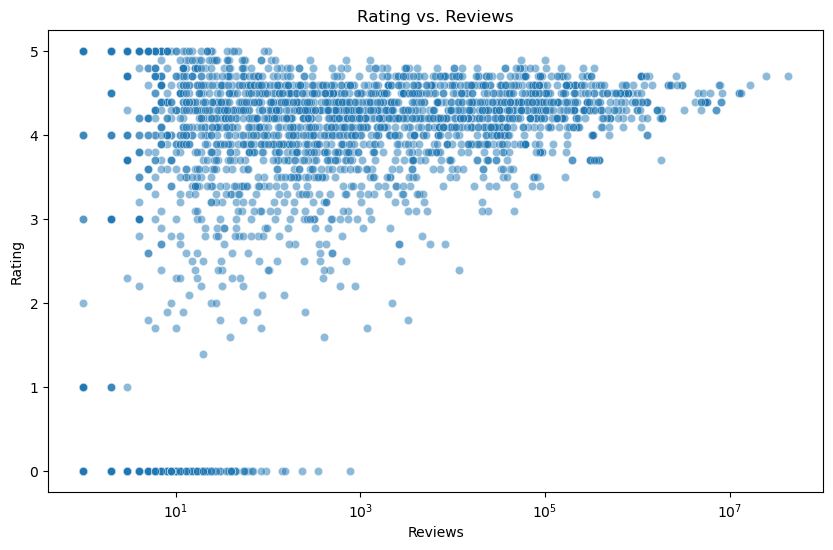

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres, x='Reviews', y='Rating', alpha=0.5)
plt.title('Rating vs. Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

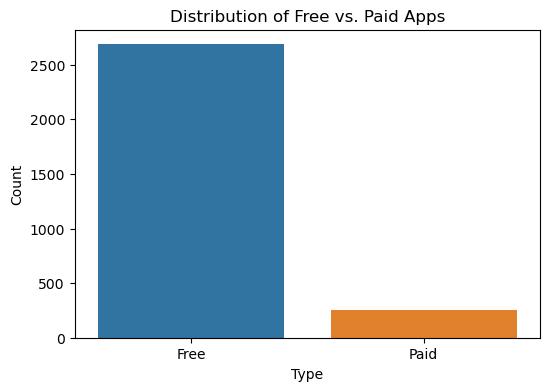

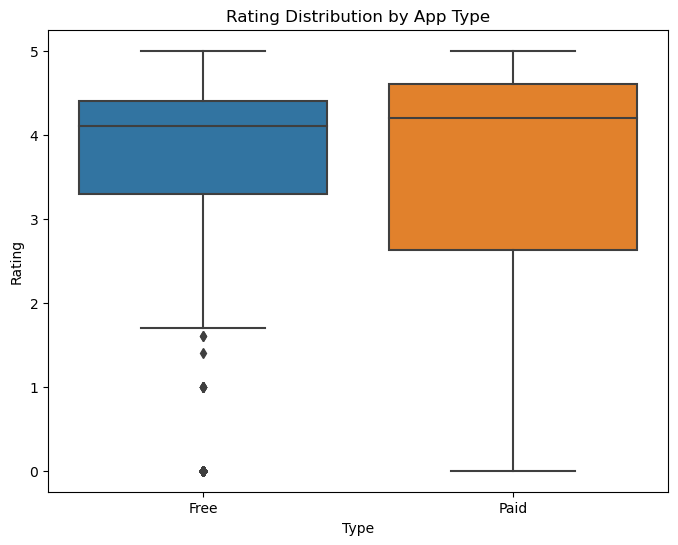

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_top_genres, x='Type')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_top_genres, x='Type', y='Rating')
plt.title('Rating Distribution by App Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

In [33]:
def size_to_megabytes(size):
    if 'M' in size:
        # Convert from M to float
        return float(size.replace('M', ''))
    elif 'k' in size:
        # Convert from k to float and divide by 1000 to convert to M
        return float(size.replace('k', '')) / 1000
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

# Apply the function to the 'Size' column
df_top_genres['Size_MB'] = df_top_genres['Size'].apply(size_to_megabytes)

/var/folders/sy/44z17tzs0lbfyhpp1k3p508c0000gn/T/ipykernel_38307/3472141159.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_genres['Size_MB'] = df_top_genres['Size'].apply(size_to_megabytes)


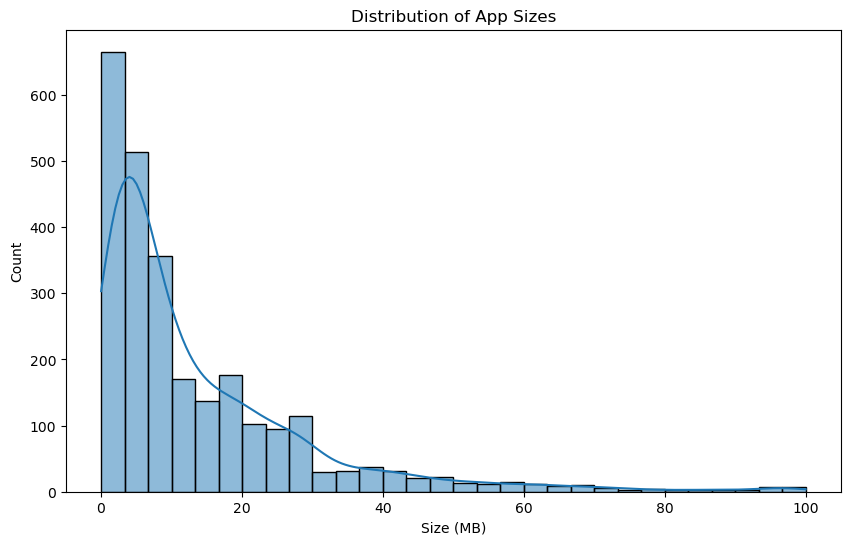

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_genres, x='Size_MB', bins=30, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.show()

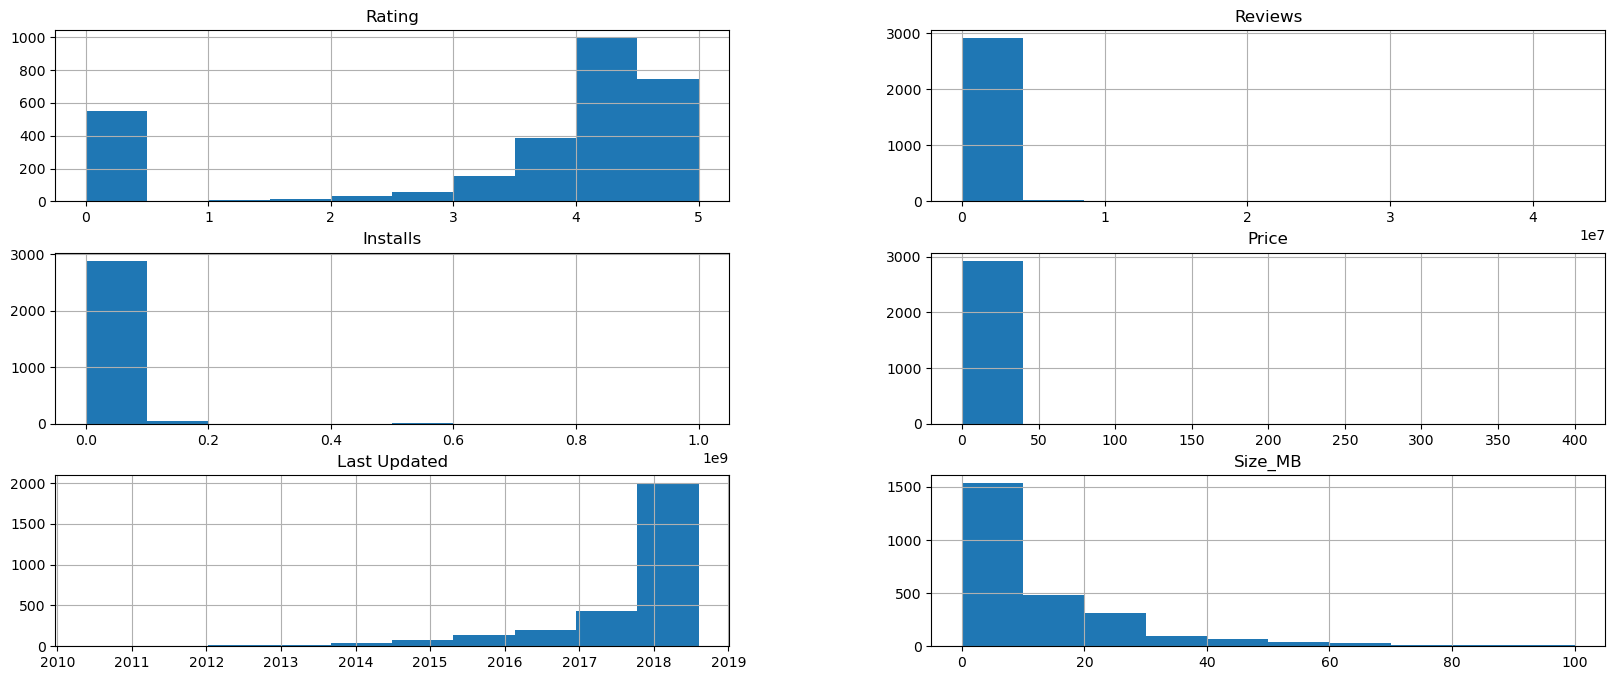

In [43]:
df_top_genres.hist(figsize=(20, 8))
plt.show()

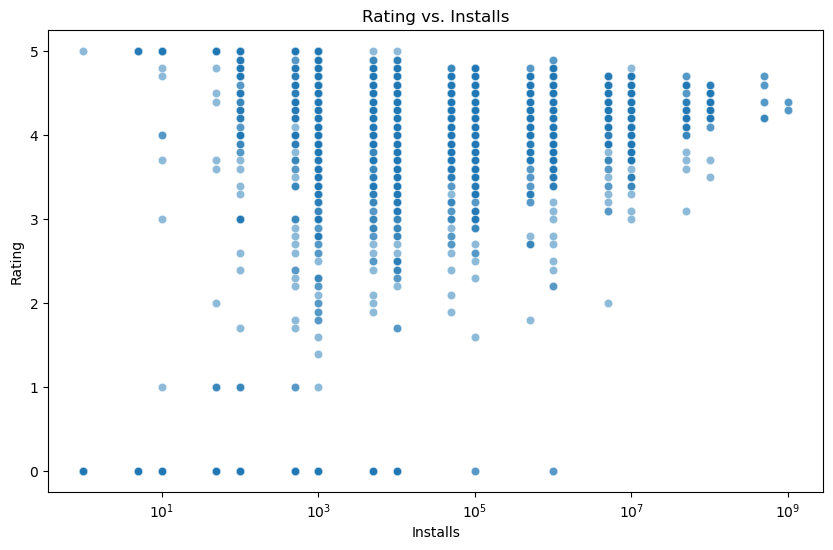

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres, x='Installs', y='Rating', alpha=0.5)
plt.title('Rating vs. Installs')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

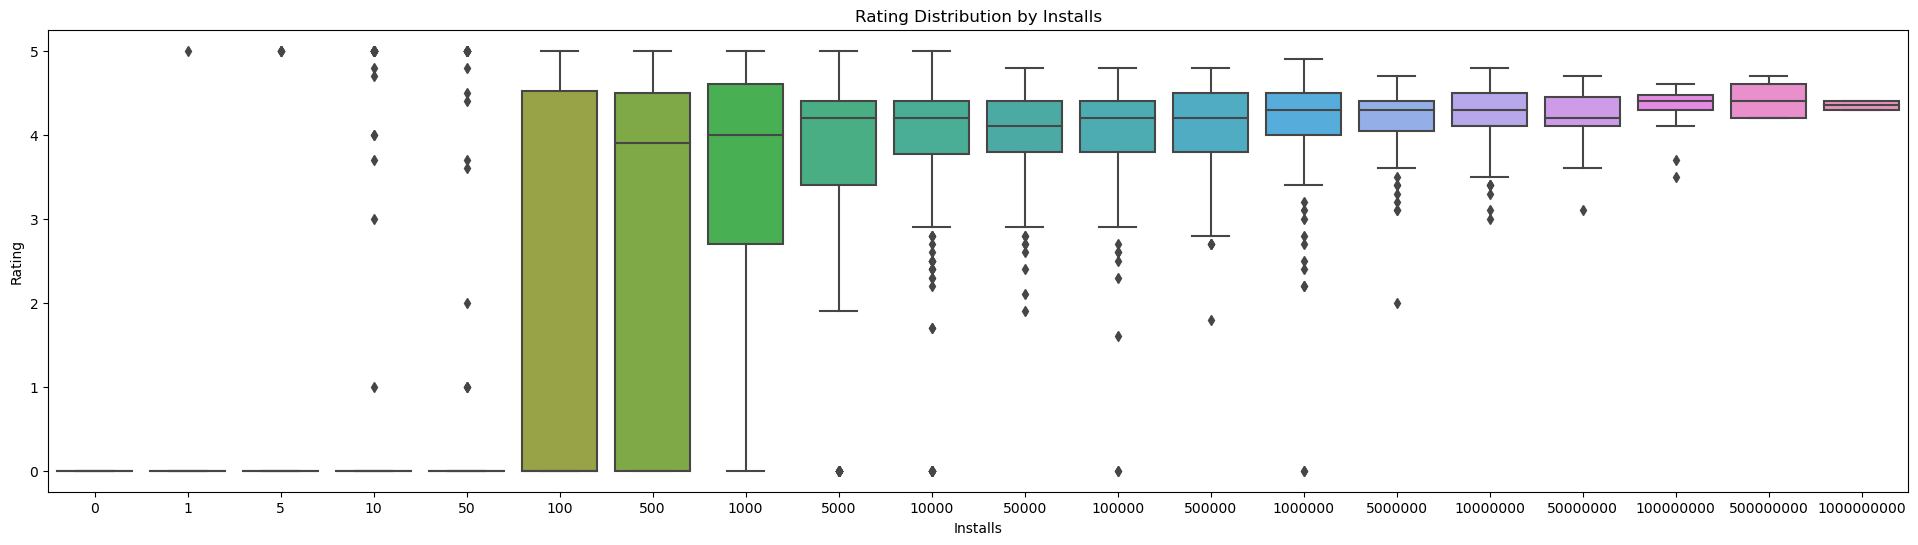

In [57]:
plt.figure(figsize=(24, 6))
sns.boxplot(data=df_top_genres, x='Installs', y='Rating')
plt.title('Rating Distribution by Installs')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

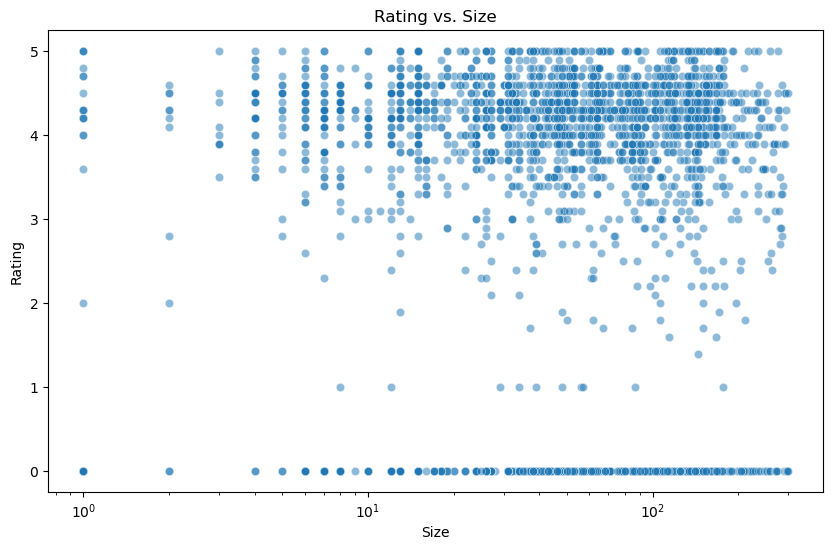

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres, x='Size', y='Rating', alpha=0.5)
plt.title('Rating vs. Size')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

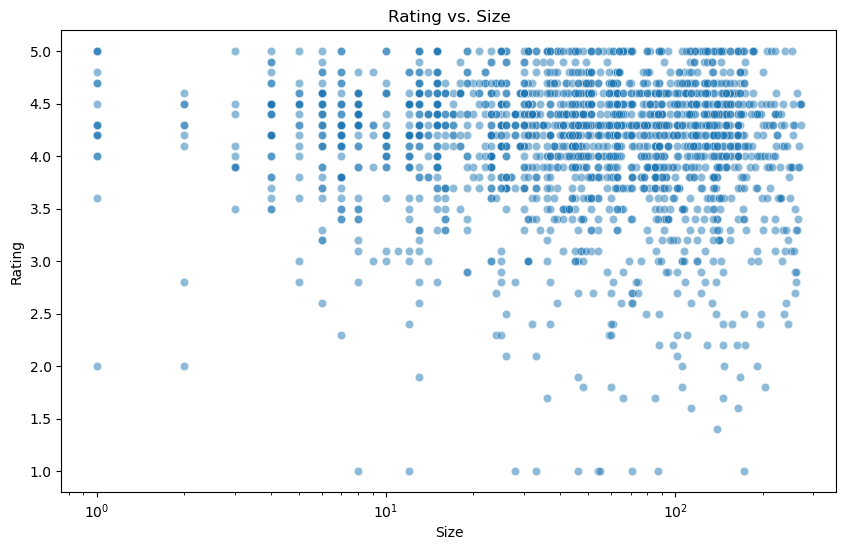

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres[df_top_genres["Rating"] != 0.0], x='Size', y='Rating', alpha=0.5)
plt.title('Rating vs. Size')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

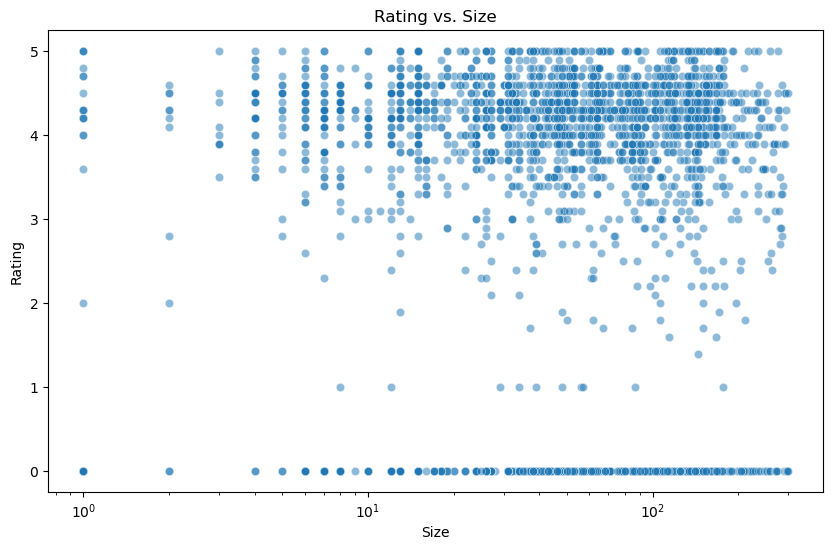

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_genres, x='Size', y='Rating', alpha=0.5)
plt.title('Rating vs. Size')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()